In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv("googleplaystore.csv")
reviews = pd.read_csv("googleplaystore_user_reviews.csv")

In [131]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [132]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00000,0.53333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25000,0.28846
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40000,0.87500
4,10 Best Foods for You,Best idea us,Positive,1.00000,0.30000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [134]:
df.shape

(10841, 13)

In [135]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [136]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [137]:
df['Type'].value_counts(dropna=False)

Free    10039
Paid      800
NaN         1
0           1
Name: Type, dtype: int64

In [138]:
type_Null = df[df['Type'].isnull()]
type_Null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [139]:
df.drop(index=9148,inplace=True)

In [140]:
content_null = df[df['Content Rating'].isnull()]
content_null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [141]:
df.drop(index=10472,inplace=True)

In [142]:
Current_Ver_Null = df[df['Current Ver'].isnull()]
Current_Ver_Null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.20000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.10000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.20000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.00000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [143]:
df['Current Ver'].value_counts(dropna=False)

Varies with device    1458
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2832, dtype: int64

In [144]:
df['Current Ver'].fillna('Varies with device', inplace=True)

In [145]:
Android_Ver_Null = df[df['Android Ver'].isnull()]
Android_Ver_Null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.40000,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.50000,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [146]:
df['Android Ver'].value_counts(dropna=False)

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1361
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
NaN                      2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [147]:
df.drop(index=[4490,4453],inplace=True)

In [148]:
df['Rating'].value_counts(dropna=False)

NaN        1473
4.40000    1108
4.30000    1076
4.50000    1037
4.20000     952
4.60000     823
4.10000     708
4.00000     568
4.70000     499
3.90000     386
3.80000     303
5.00000     274
3.70000     239
4.80000     234
3.60000     174
3.50000     163
3.40000     128
3.30000     102
4.90000      87
3.00000      83
3.10000      69
3.20000      64
2.90000      45
2.80000      42
2.70000      25
2.60000      25
2.50000      21
2.30000      20
2.40000      19
1.00000      16
2.20000      14
1.90000      13
2.00000      12
1.70000       8
1.80000       8
2.10000       8
1.60000       4
1.40000       3
1.50000       3
1.20000       1
Name: Rating, dtype: int64

In [149]:
df['Rating'].fillna(df['Rating'].mean,inplace=True)

In [150]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [151]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.20000,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.20000,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.40000,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.40000,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.00000,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.60000,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.60000,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.60000,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.30000,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [152]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [153]:
df['Installs'] = df.apply(lambda row: row['Installs'].replace(',','')[:-1], axis=1)

In [154]:
df['Installs'] = pd.to_numeric(df['Installs'])
pd.options.display.float_format = '{:.5f}'.format

In [155]:
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [156]:
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

In [157]:
indexSize = df[df['Size']==0].index
df.drop(indexSize, inplace=True)

In [158]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df.Price.apply(lambda x: x.replace('.', ''))
df['Price'] = pd.to_numeric(df['Price'])

In [159]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00000,0.53333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25000,0.28846
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40000,0.87500
4,10 Best Foods for You,Best idea us,Positive,1.00000,0.30000


In [160]:
reviews.shape

(64295, 5)

In [161]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [162]:
reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [163]:
reviews.dropna(inplace=True)

In [164]:
reviews[reviews.duplicated()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
78,10 Best Foods for You,Good,Positive,0.70000,0.60000
79,10 Best Foods for You,Good,Positive,0.70000,0.60000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00000,0.53333
101,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25000,0.28846
103,10 Best Foods for You,Works great especially going grocery store,Positive,0.40000,0.87500
...,...,...,...,...,...
64071,Hotels.com: Book Hotel Rooms & Find Vacation D...,Made account using Google account. No option G...,Negative,-0.50000,0.50000
64073,Hotels.com: Book Hotel Rooms & Find Vacation D...,The new system showing Top 10 whole search res...,Negative,-0.03273,0.67091
64075,Hotels.com: Book Hotel Rooms & Find Vacation D...,Mobile currently crashing. Their international...,Neutral,0.00000,0.20000
64113,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.70000,0.60000


In [165]:
reviews.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

[Text(0, 0.5, 'Categories'), Text(0.5, 0, 'Total Installations')]

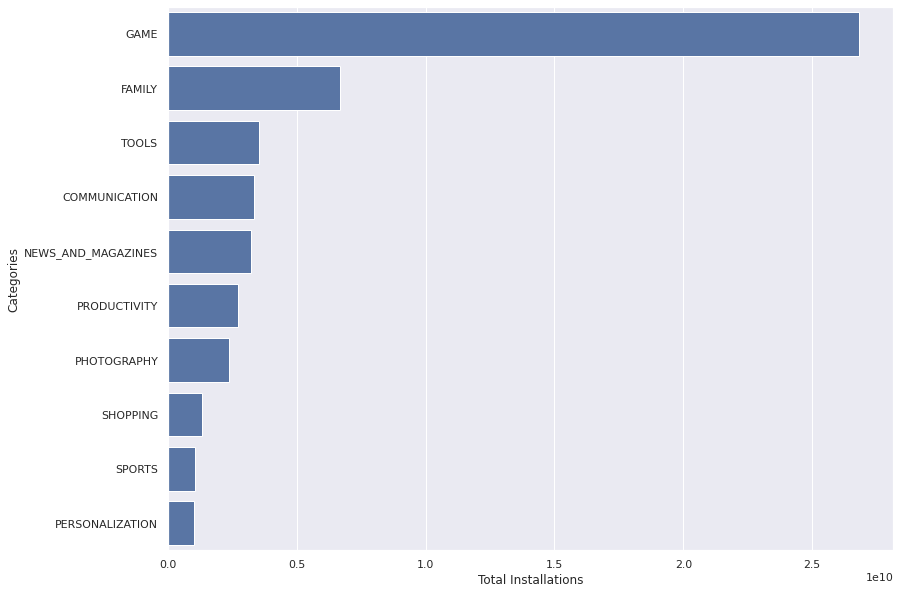

In [166]:
# 1) Plot the categories according to download time (try to see if they fit in one plot, if there are too many , make top10 or top20)

most_popular = df.groupby('Category').sum().sort_values(by=['Installs'], ascending=False).head(10)
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(13, 10))
sns.barplot(x="Installs", y=most_popular.index, data=most_popular, label="Installs", color="b")
ax.set(ylabel="Categories", xlabel="Total Installations")

In [167]:
# 2) Top 5 downloaded apps (show to which category they belong to)
top_5_apps = top_5_apps[["App","Category", "Installs"]].sort_values("Installs", ascending=False)
top_5_apps.head(5)

,App,Category,Installs
1654,Subway Surfers,GAME,1000000000
3736,Google News,NEWS_AND_MAGAZINES,1000000000
1661,Temple Run 2,GAME,500000000
3473,Dropbox,PRODUCTIVITY,500000000
3994,Candy Crush Saga,FAMILY,500000000


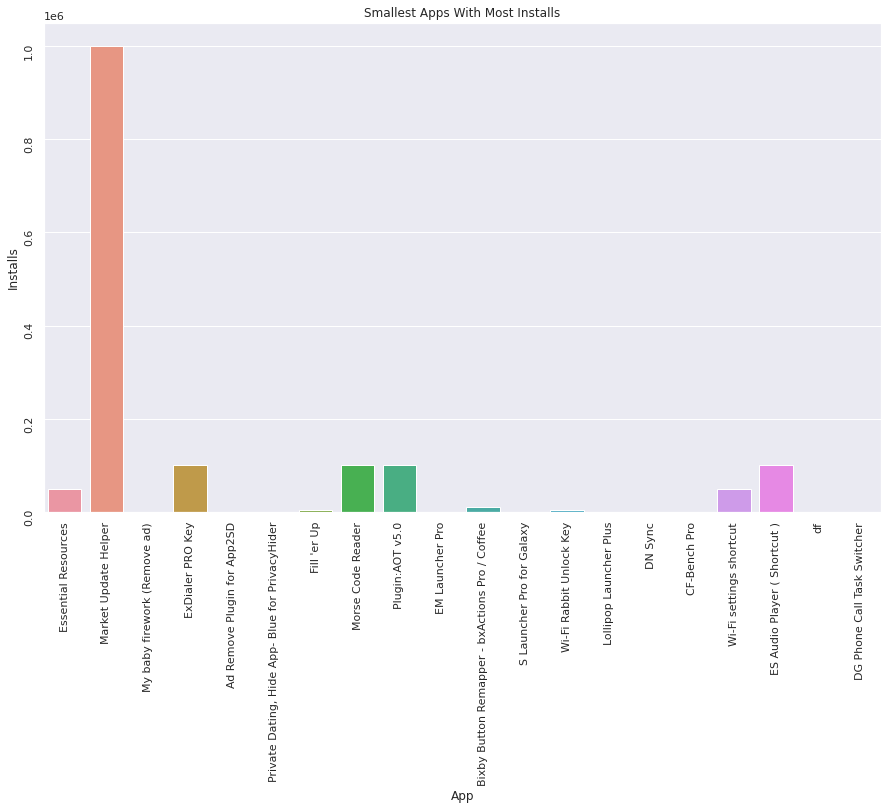

In [168]:
smallest_size = df.sort_values(['Size']).head(20)

name_of_the_apps = smallest_size['App']
number_of_installs = smallest_size['Installs']
smallest_size_app = smallest_size.sort_values(['App'], ascending=True)
 
plt.figure(figsize=(15,9))
sns.barplot(x = name_of_the_apps, y = number_of_installs, data=smallest_size)
plt.tick_params(rotation=90)
plt.title("Smallest Apps With Most Installs")
plt.show()

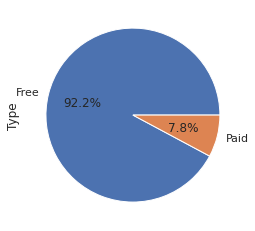

In [169]:
# - From the top 20 smallest apps we want to see grouped by category and plot the categories. + add pie chart of how many of them are paid.

df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

<ipython-input-170-353a8def0ba6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps['Revenue'] = paid_apps.Price * paid_apps.Installs


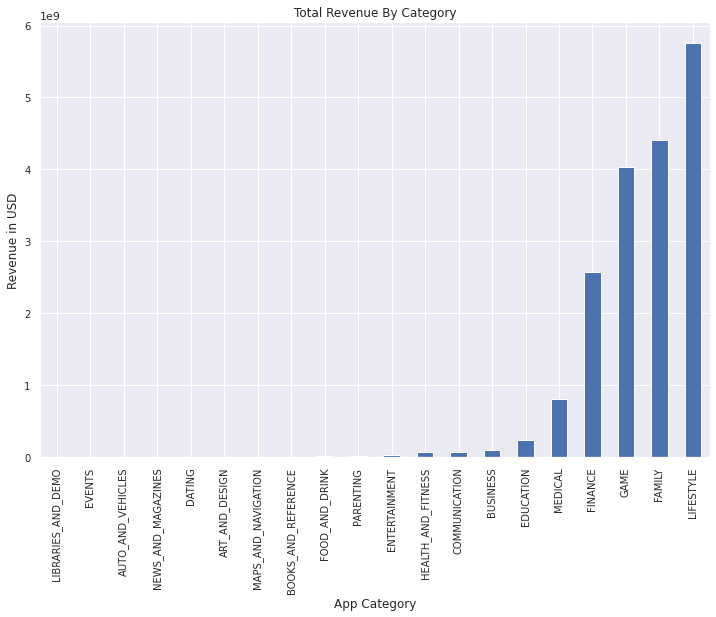

In [170]:
# - From the paid apps. We want to see top 20 by revenue, in a table. (and see if there is any category prevalent)

paid_apps = df[df.Price > 0]
paid_apps['Revenue'] = paid_apps.Price * paid_apps.Installs

paid_apps.groupby('Category').sum().head(20).sort_values(by = 'Revenue')['Revenue'].plot(kind = 'bar',title='Total Revenue By Category', fontsize=10, figsize = (12, 8));
plt.xlabel('App Category')
plt.ylabel('Revenue in USD');

AxesSubplot(0.125,0.125;0.775x0.755)


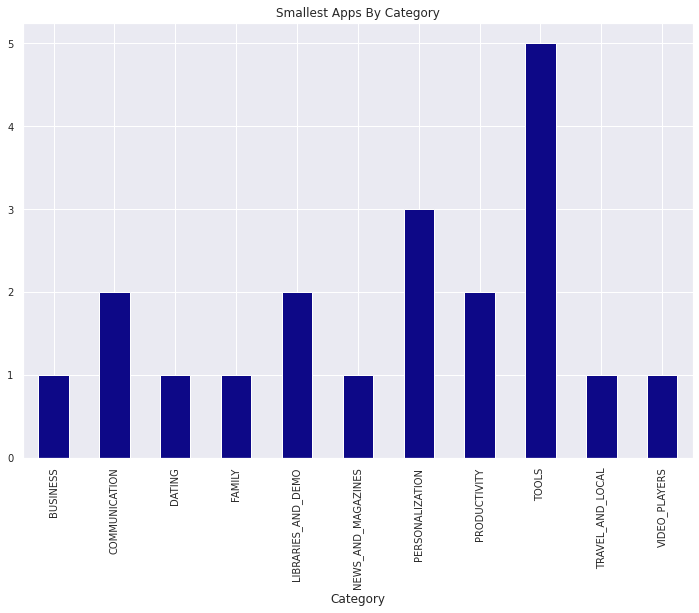

In [171]:
smallest_size = df.sort_values(['Size']).head(20)
data2 = smallest_size.groupby(['Category'])['App'].count().plot(kind = 'bar',title='Smallest Apps By Category', fontsize=10, figsize = (12, 8), colormap='plasma')
print(data2)

AxesSubplot(0.260833,0.125;0.503333x0.755)


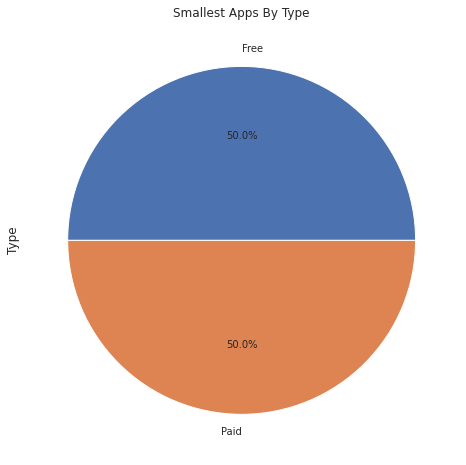

In [172]:
data3 = smallest_size.groupby(['Type'])['Type'].count().plot(kind = 'pie',autopct = "%1.1f%%",title='Smallest Apps By Type', fontsize=10, figsize = (12, 8))
print(data3)

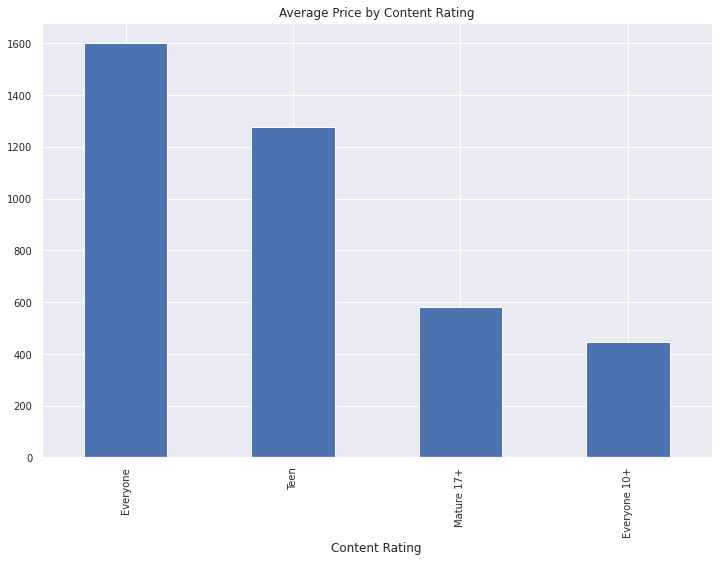

In [173]:
# 5. From table googleplaystore. Explore Paid apps and Price, and column Content Rating. Find the Content Rating with the most expensive apps 
# (average app price!! by content, should be 5 rows)

apps_paid = df[df.Price > 0]
avg_price_by_content = apps_paid.groupby('Content Rating')['Price'].mean()
avg_price_by_content.sort_values(ascending = False).plot(kind= 'bar',title='Average Price by Content Rating', fontsize=10, figsize = (12, 8))

Text(0, 0.5, 'Revenue in USD Billions')

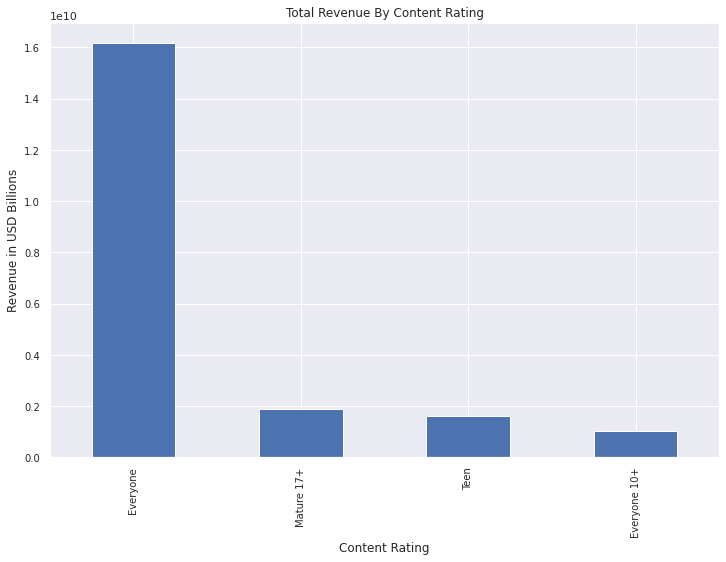

In [174]:
# 6. From the table of top 20 apps by revenue(from the previous task) group by Content Rating and plot. 
# Are the results similar to the average price question (5)?

top_20_paid_apps = paid_apps.groupby(['Content Rating'])["Revenue"].sum().head(20)
top_20_paid_apps.sort_values(ascending=False).plot(kind='bar', title='Total Revenue By Content Rating', fontsize=10, figsize =(12, 8))
plt.xlabel('Content Rating')
plt.ylabel('Revenue in USD Billions')

In [175]:
merged_df = pd.merge(reviews, df, how="inner", on="App")


In [176]:
positive_sentiment = merged_df[merged_df['Sentiment']=='Positive']
positive_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00000,0.53333,HEALTH_AND_FITNESS,4.00000,2490,3.80000,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25000,0.28846,HEALTH_AND_FITNESS,4.00000,2490,3.80000,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40000,0.87500,HEALTH_AND_FITNESS,4.00000,2490,3.80000,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,Best idea us,Positive,1.00000,0.30000,HEALTH_AND_FITNESS,4.00000,2490,3.80000,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Best way,Positive,1.00000,0.30000,HEALTH_AND_FITNESS,4.00000,2490,3.80000,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


Text(0.5, 1.0, 'Distribution of apps by review sentiment(%)')

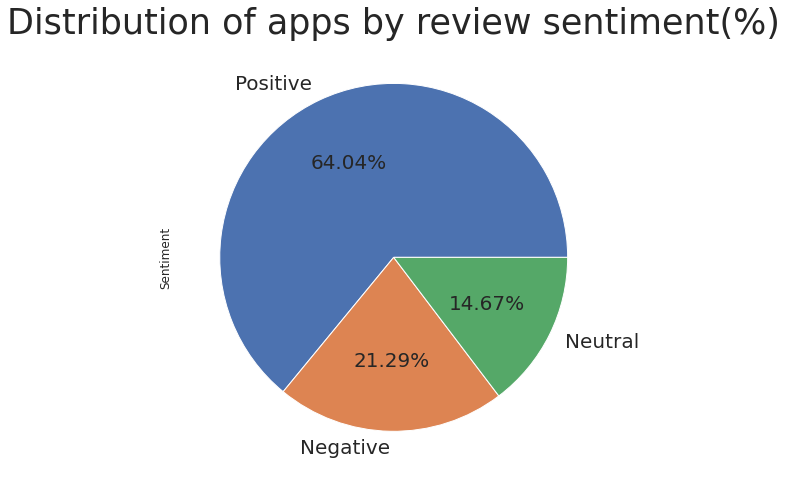

In [177]:
# The % distribution of apps by review sentiment
plt.figure(figsize=(10,8))
reviews['Sentiment'].value_counts().plot.pie(autopct = "%1.2f%%",fontsize=20)
plt.title("Distribution of apps by review sentiment(%)",fontsize=35)

Text(0.5, 1.0, 'Distribution of Positive Sentimen Apps by Type(%)')

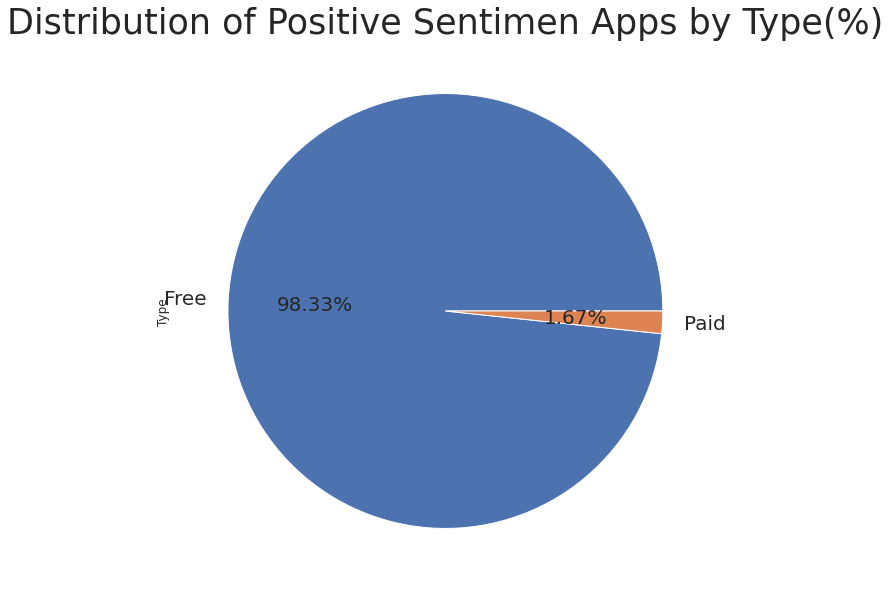

In [178]:
# From the column Sentiment use only the apps that have positive reviews. Find what % of them are paid and what are free.

plt.figure(figsize=(10,10))
positive_sentiment.groupby('Type')['Type'].count().plot.pie(autopct = "%1.2f%%",fontsize=20)
plt.title("Distribution of Positive Sentimen Apps by Type(%)", fontsize=35)


In [179]:
paid_positive_sentiment.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5401,BIG Launcher,Great simple 83 year old like use. A bugs 1) O...,Positive,0.22500,0.35179,PERSONALIZATION,4.30000,881,5.90000,10000,Paid,999,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up
5404,BIG Launcher,It's great sight impaired people,Positive,0.80000,0.75000,PERSONALIZATION,4.30000,881,5.90000,10000,Paid,999,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up
5405,BIG Launcher,"Have using Nova Launcher, wanted something sim...",Positive,0.16875,0.34063,PERSONALIZATION,4.30000,881,5.90000,10000,Paid,999,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up
5406,BIG Launcher,"Okay, I'm trying get sister, ill hospital, set...",Positive,0.17708,0.51927,PERSONALIZATION,4.30000,881,5.90000,10000,Paid,999,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up
5407,BIG Launcher,Good idea - needs improvement. Paid 10 dollars...,Positive,0.23000,0.36000,PERSONALIZATION,4.30000,881,5.90000,10000,Paid,999,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up


In [180]:
paid_positive_sentiment = positive_sentiment[positive_sentiment['Type']=='Paid']
most_popular_paid_positive_sentiment = paid_positive_sentiment.groupby('Category').sum().sort_values(by='Installs')['Installs']
most_popular_paid_positive_sentiment

Category
SPORTS              1500000
MEDICAL             1783000
GAME                2400000
FAMILY              2800000
PERSONALIZATION    76260000
Name: Installs, dtype: int64

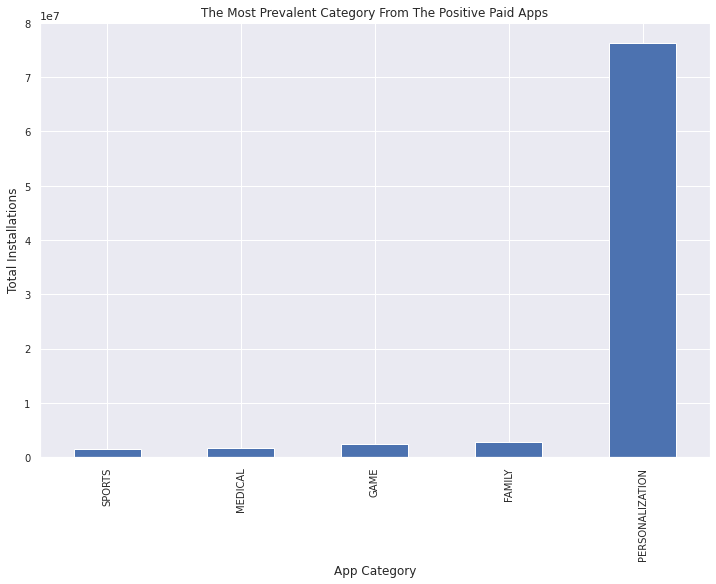

In [181]:
most_popular_paid_positive_sentiment.plot(kind = 'bar',title='The Most Prevalent Category From The Positive Paid Apps', fontsize=10, figsize = (12, 8));
plt.xlabel('App Category')
plt.ylabel('Total Installations');